# Importing Data 

In [1]:
import pandas as pd

In [23]:
data=pd.read_csv('Company Stock and Investment.csv')

In [4]:
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [5]:
data.shape

(1984, 5)

In [ ]:
#Dropping the non important feature

In [6]:
data.drop(['Other sharesInvestments'], axis=1 ,inplace =True)

In [7]:
data.isnull().sum()

Date                0
Oil Investments     0
Gold Investments    0
Comp Stock          0
dtype: int64

In [8]:
data['Oil Investments']

0       0.025417
1       0.026830
2       0.002699
3       0.021688
4      -0.006256
          ...   
1979    0.005984
1980   -0.007173
1981    0.000352
1982   -0.019376
1983   -0.007006
Name: Oil Investments, Length: 1984, dtype: float64

As per the dependent features , this project is divided in three section 

1) Prediction on Oil Investment

2) Prediction on Gold Investments

3) Prediction on  Comp Stock

# 1.Prediction on Oil Investment

In [8]:
df=pd.DataFrame(data, columns=['Date','Oil Investments'])

In [9]:
df

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


# Treatment and outlier removal 

In [10]:
import numpy as np
from scipy.stats import zscore
zs=np.abs(zscore(df['Oil Investments']))
zs

array([0.83768566, 0.88345251, 0.10154433, ..., 0.02551751, 0.61375342,
       0.21290234])

In [11]:
df=df[(zs<3)]


In [12]:
df.shape

(1975, 2)

# Treatment of Zero/ Negative Values

In [13]:
df['Oil Investments']=np.square(df['Oil Investments']+0.001)

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.describe()

,Oil Investments
count,1.975000e+03
mean,4.082025e-04
std,8.112423e-04
min,1.531159e-10
25%,2.591195e-05
50%,1.232140e-04
75%,4.242391e-04
max,8.458354e-03


In [15]:
print(df.index.min())
print(df.index.max())

0
1983


# Indexing the DataFrame on Date

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [16]:
df = df.set_index('Date')
df.index

Index(['31-12-2009', '04-01-2010', '05-01-2010', '06-01-2010', '07-01-2010',
       '08-01-2010', '11-01-2010', '12-01-2010', '13-01-2010', '14-01-2010',
       ...
       '02-11-2017', '03-11-2017', '06-11-2017', '07-11-2017', '08-11-2017',
       '09-11-2017', '10-11-2017', '13-11-2017', '14-11-2017', '15-11-2017'],
      dtype='object', name='Date', length=1975)

# Plotting the Graph

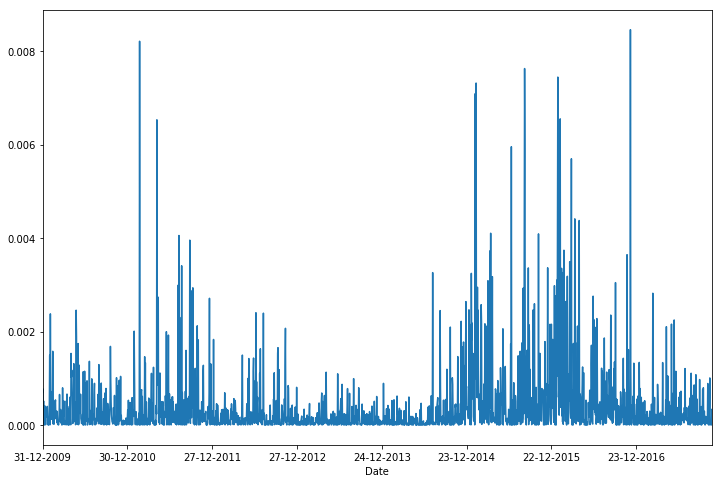

In [18]:
import matplotlib.pyplot as plt
df['Oil Investments'].plot(figsize=(12,8))
plt.show()

# Testing For Stationarity

In [19]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Oil Investments']) # adfuller give us 5 values
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-6.1114253946086174, 9.312741261209897e-08, 15, 1959, {'1%': -3.433692465214729, '5%': -2.8630165042063163, '10%': -2.567556030574193}, -22423.395463348606)


In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(investment):
    result=adfuller(investment) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [21]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -6.1114253946086174
p-value : 9.312741261209897e-08
#Lags Used : 15
Number of Observations Used : 1959
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


As per the P value the data is stationary

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\matplotlib\pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


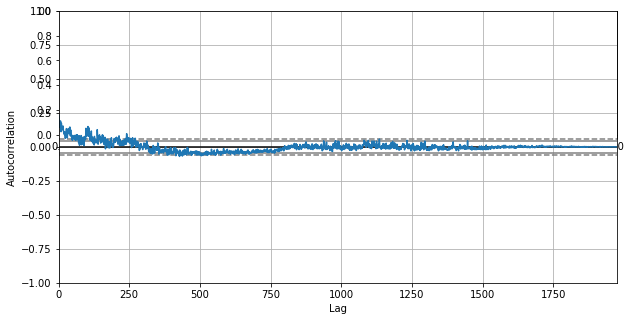

In [22]:
from pandas.plotting import autocorrelation_plot
fig =plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
autocorrelation_plot(df['Oil Investments'])
plt.show()

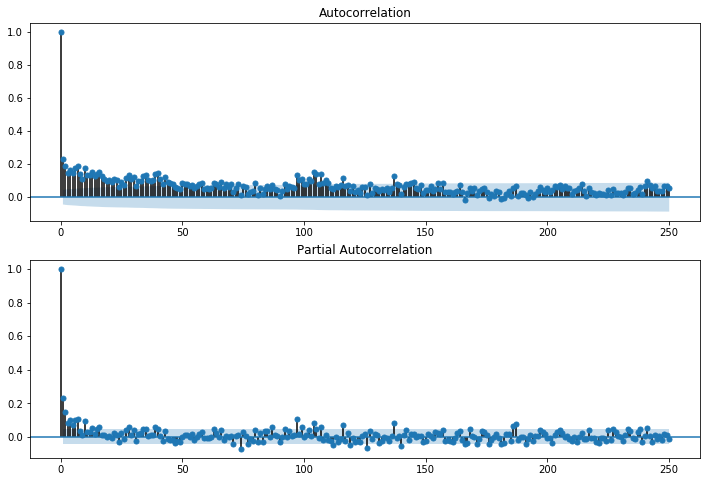

In [23]:
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Oil Investments'],lags=250,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Oil Investments'],lags=250,ax=ax2)

In [ ]:
data.index[1983]

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df['Oil Investments'],order=(5,0,5)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Oil Investments   No. Observations:                 1975
Model:                     ARMA(5, 5)   Log Likelihood               11393.129
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 29 Oct 2020   AIC                         -22762.259
Time:                        21:16:43   BIC                         -22695.199
Sample:                             0   HQIC                        -22737.620
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0004    8.1e-05      4.953      0.000       0.000       0.001
ar.L1.Oil Investments     0.4509      0.147      3.071      0.002       0.163       0.739
ar.L2.Oil Investments    -0.7157      0.170     -4.199      0.000      -1.050      -0.382
ar.L3.Oil Investments     0.8865      0.056     15.695      0.000       0.776       0.997
ar.L4.Oil Investments    -0.3470      0.139     -2.506      0.012      -0.618      -0.076
ar.L5.Oil Investments     0.6592      0.151      4.369      0.000       0.364       0.955
ma.L1.Oil Investments    -0.3166      0.142     -2.224      0.026      -0.596      -0.038
ma.L2.Oil Investments     0.7549      0.155      4.877      0.000       0.451       1.058
ma.L3.Oil Investments    -0.8000      0.051    -15.549      0.000      -0.901      -0.699
ma.L4.Oil Investments     0.3462      0.132      2.622      0.009       0.087       0.605
ma.L5.Oil Investments    -0.6629      0.133     -4.988      0.000      -0.923      -0.402
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0178           -0.0000j            1.0178           -0.0000
AR.2           -0.5315           -0.9098j            1.0537           -0.3341
AR.3           -0.5315           +0.9098j            1.0537            0.3341
AR.4            0.2858           -1.1228j            1.1586           -0.2103
AR.5            0.2858           +1.1228j            1.1586            0.2103
MA.1            1.0864           -0.0000j            1.0864           -0.0000
MA.2           -0.5367           -0.8873j            1.0370           -0.3366
MA.3           -0.5367           +0.8873j            1.0370            0.3366
MA.4            0.2547           -1.1074j            1.1363           -0.2140
MA.5            0.2547           +1.1074j            1.1363            0.2140
-----------------------------------------------------------------------------
"""

In [118]:
start_index = '08-01-2010'
end_index = '08-01-2019'
#forecast = model_fit.predict(start=start_index, end=end_index)

# Fitting ARIMA model on data 

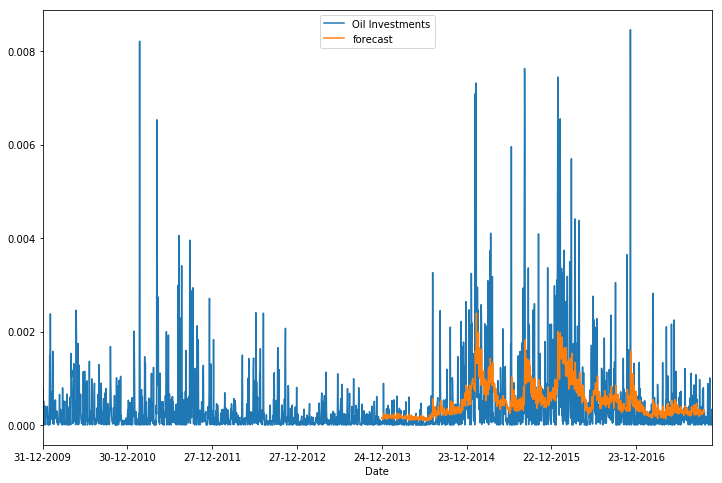

In [36]:
import datetime
df['forecast']=model_fit.predict(start=1000, end =1950)
#model_fit.plot_predict(start=datetime(2014,7,1), end=datetime(2019,12,31))
#plt.show()
df[['Oil Investments','forecast']].plot(figsize=(12,8))

# Fitting SARIMAX model on data

In [39]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [41]:
model=sm.tsa.statespace.SARIMAX(df['Oil Investments'],order=(5, 0, 5),seasonal_order=((5,0,5,0))) #(p,d,q,Shift)
results=model.fit()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


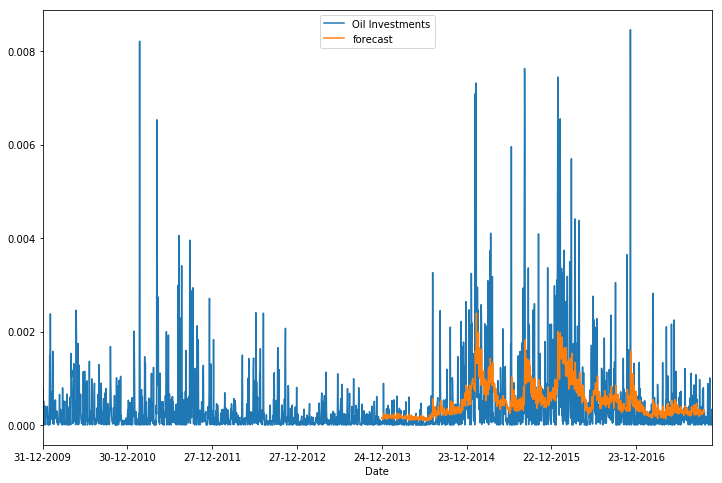

In [45]:
data['forecast']=results.predict(start=1000,end=5000, dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

# 2) Prediction on Gold Investments

In [24]:
data['Gold Investments']

0       0.000150
1       0.001097
2       0.001560
3       0.006009
4       0.000221
          ...   
1979    0.000623
1980   -0.000389
1981   -0.004944
1982   -0.002621
1983    0.005963
Name: Gold Investments, Length: 1984, dtype: float64

In [25]:
df=pd.DataFrame(data, columns=['Date','Gold Investments'])

In [26]:
df

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221
...,...,...
1979,09-11-2017,0.000623
1980,10-11-2017,-0.000389
1981,13-11-2017,-0.004944
1982,14-11-2017,-0.002621


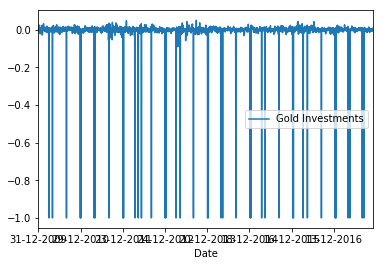

In [27]:
import matplotlib.pyplot as plt
df.plot(x='Date', y='Gold Investments')
plt.show()

# Treatment and outlier removal

In [28]:
import numpy as np
from scipy.stats import zscore
zs=np.abs(zscore(df['Gold Investments']))
zs

array([0.14405329, 0.15077486, 0.15406425, ..., 0.10790837, 0.12439134,
       0.18530141])

In [29]:
df=df[(zs<3)]

In [30]:
df.shape

(1944, 2)

In [21]:
df['Gold Investments']

0       0.000150
1       0.001097
2       0.001560
3       0.006009
4       0.000221
          ...   
1979    0.000623
1980   -0.000389
1981   -0.004944
1982   -0.002621
1983    0.005963
Name: Gold Investments, Length: 1944, dtype: float64

# Treatment Negative/Zeroes values 

In [31]:
df['Gold Investments']=np.square(df['Gold Investments']+0.001)

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df = df.set_index('Date')
df.index

Index(['31-12-2009', '04-01-2010', '05-01-2010', '06-01-2010', '07-01-2010',
       '08-01-2010', '11-01-2010', '12-01-2010', '13-01-2010', '14-01-2010',
       ...
       '02-11-2017', '03-11-2017', '06-11-2017', '07-11-2017', '08-11-2017',
       '09-11-2017', '10-11-2017', '13-11-2017', '14-11-2017', '15-11-2017'],
      dtype='object', name='Date', length=1944)

Plotting The Gold Investments vs Date 

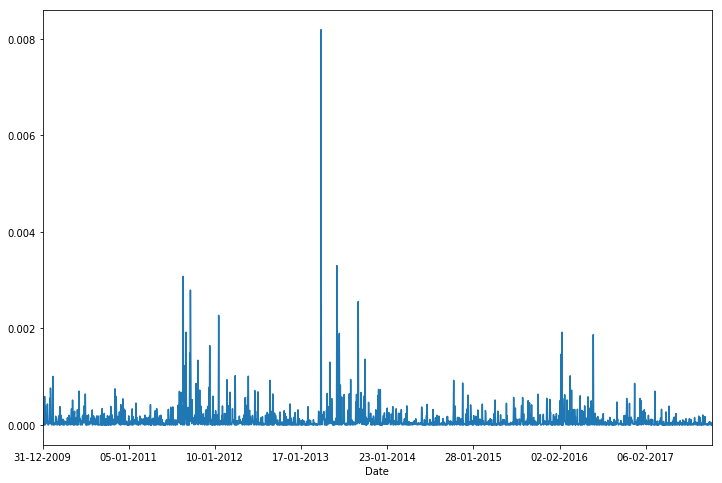

In [33]:
import matplotlib.pyplot as plt
df['Gold Investments'].plot(figsize=(12,8))
plt.show()

# Testing For Stationarity

In [34]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Gold Investments']) # adfuller give us 5 values
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-5.5428921626824055, 1.6860051010936763e-06, 25, 1918, {'1%': -3.433764011166506, '5%': -2.8630480909238947, '10%': -2.5675728490857157}, -25699.31953784433)


In [35]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(investment):
    result=adfuller(investment) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [36]:
adfuller_test(df['Gold Investments'])

ADF Test Statistic : -5.5428921626824055
p-value : 1.6860051010936763e-06
#Lags Used : 25
Number of Observations Used : 1918
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


as per the P value the data is stationary

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\matplotlib\pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


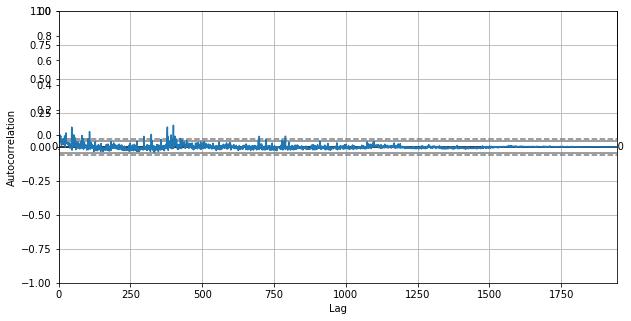

In [37]:
from pandas.plotting import autocorrelation_plot
fig =plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
autocorrelation_plot(df['Gold Investments'])
plt.show()

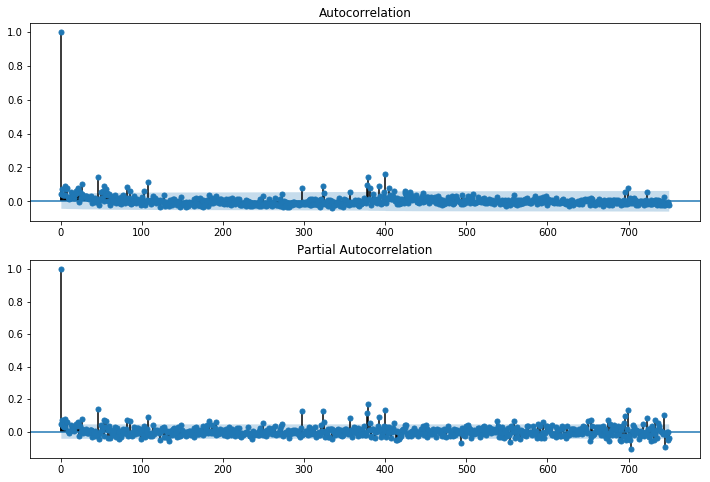

In [38]:
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Gold Investments'],lags=750,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Gold Investments'],lags=750,ax=ax2)

In [39]:
from statsmodels.tsa.arima_model import ARIMA

# Fitting the data on ARIMA  with p=3, q=3, i=0

In [41]:
model=ARIMA(df['Gold Investments'],order=(3,0,3)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [42]:
model_fit.summary()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Gold Investments   No. Observations:                 1944
Model:                     ARMA(3, 3)   Log Likelihood               13045.623
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sun, 01 Nov 2020   AIC                         -26075.246
Time:                        14:09:48   BIC                         -26030.666
Sample:                             0   HQIC                        -26058.854
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0001   1.73e-05      6.237      0.000    7.42e-05       0.000
ar.L1.Gold Investments    -0.2093      0.307     -0.682      0.495      -0.811       0.392
ar.L2.Gold Investments     0.4739      0.175      2.712      0.007       0.131       0.816
ar.L3.Gold Investments     0.6789        nan        nan        nan         nan         nan
ma.L1.Gold Investments     0.2299      0.316      0.729      0.466      -0.389       0.848
ma.L2.Gold Investments    -0.4301      0.179     -2.404      0.016      -0.781      -0.079
ma.L3.Gold Investments    -0.6507        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0200           -0.0000j            1.0200           -0.0000
AR.2           -0.8591           -0.8403j            1.2017           -0.3768
AR.3           -0.8591           +0.8403j            1.2017            0.3768
MA.1            1.0549           -0.0000j            1.0549           -0.0000
MA.2           -0.8579           -0.8490j            1.2070           -0.3758
MA.3           -0.8579           +0.8490j            1.2070            0.3758
-----------------------------------------------------------------------------
"""

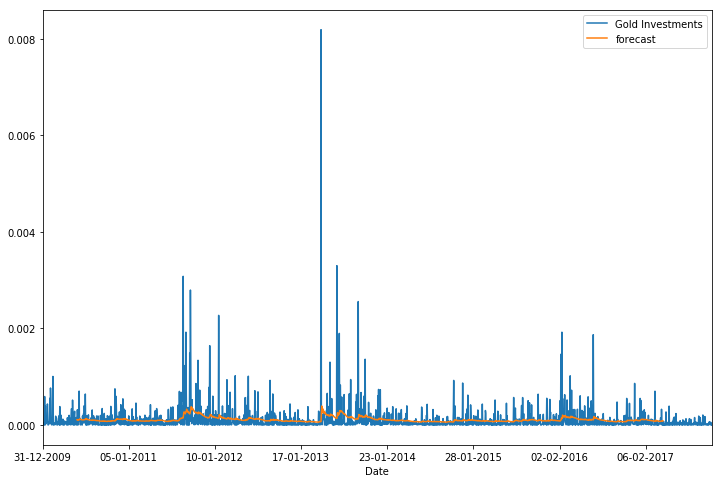

In [45]:
import datetime
df['forecast']=model_fit.predict(start=100, end =1800)
#model_fit.plot_predict(start=datetime(2014,7,1), end=datetime(2019,12,31))
#plt.show()
df[['Gold Investments','forecast']].plot(figsize=(12,8))

# Fitting Data on Sarimax with p , q , d value

In [48]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [57]:
model=sm.tsa.statespace.SARIMAX(df['Gold Investments'],order=(1, 0, 1),seasonal_order=((1,0,1,0))) #(p,d,q,Shift)
results=model.fit(enforce_stationarity=False)

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


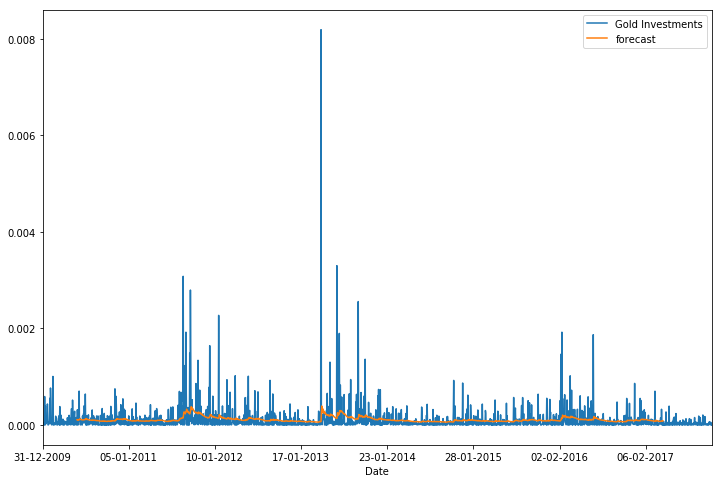

# 3) Prediction on Comp Stock

In [76]:
data['Comp Stock']

0       0.017354
1       0.015565
2       0.001729
3      -0.015906
4      -0.001849
          ...   
1979   -0.002043
1980   -0.006880
1981   -0.004008
1982   -0.015118
1983   -0.013190
Name: Comp Stock, Length: 1984, dtype: float64

In [77]:
df=pd.DataFrame(data, columns=['Date','Comp Stock'])

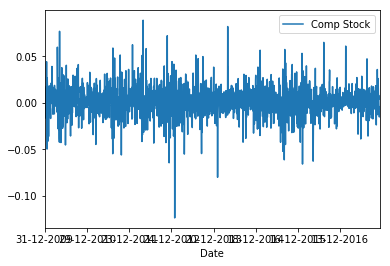

In [78]:
import matplotlib.pyplot as plt
df.plot(x='Date', y='Comp Stock')
plt.show()

In [79]:
df['Comp Stock']=np.square(df['Comp Stock']+0.001)

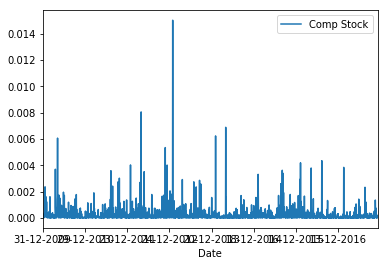

In [80]:
import matplotlib.pyplot as plt
df.plot(x='Date', y='Comp Stock')
plt.show()

In [81]:
df = df.set_index('Date')
df.index

Index(['31-12-2009', '04-01-2010', '05-01-2010', '06-01-2010', '07-01-2010',
       '08-01-2010', '11-01-2010', '12-01-2010', '13-01-2010', '14-01-2010',
       ...
       '02-11-2017', '03-11-2017', '06-11-2017', '07-11-2017', '08-11-2017',
       '09-11-2017', '10-11-2017', '13-11-2017', '14-11-2017', '15-11-2017'],
      dtype='object', name='Date', length=1984)

In [82]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Comp Stock']) # adfuller give us 5 values
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-9.909198480302821, 3.2025498558559614e-17, 12, 1971, {'1%': -3.4336720887549483, '5%': -2.863007508094813, '10%': -2.567551240570721}, -23159.44939091753)


In [83]:
adfuller_test(df['Comp Stock'])

ADF Test Statistic : -9.909198480302821
p-value : 3.2025498558559614e-17
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


Data is stationary  as P values < 0.05

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\matplotlib\pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


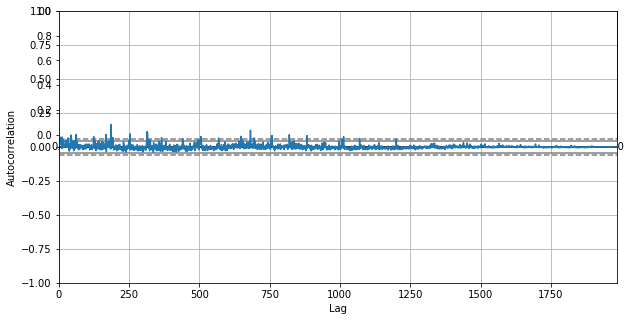

In [84]:
from pandas.plotting import autocorrelation_plot
fig =plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
autocorrelation_plot(df['Comp Stock'])
plt.show()

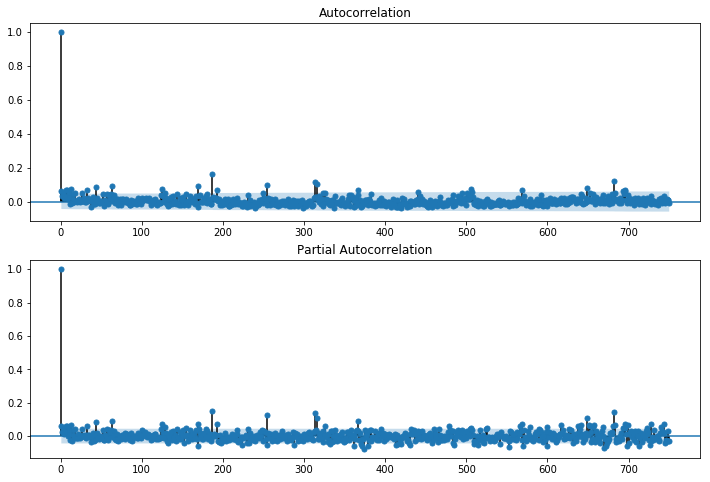

In [85]:
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Comp Stock'],lags=750,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Comp Stock'],lags=750,ax=ax2)

# Fitting on Arimax and sarimax in the subsequent blocks and plotting the prediction

In [86]:
model=ARIMA(df['Comp Stock'],order=(3,0,3)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [87]:
model_fit.summary()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Comp Stock   No. Observations:                 1984
Model:                     ARMA(3, 3)   Log Likelihood               11744.283
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sun, 01 Nov 2020   AIC                         -23472.567
Time:                        15:05:31   BIC                         -23427.824
Sample:                             0   HQIC                        -23456.131
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0003   2.53e-05     10.304      0.000       0.000       0.000
ar.L1.Comp Stock    -0.1263        nan        nan        nan         nan         nan
ar.L2.Comp Stock     0.3553        nan        nan        nan         nan         nan
ar.L3.Comp Stock     0.6390        nan        nan        nan         nan         nan
ma.L1.Comp Stock     0.1591        nan        nan        nan         nan         nan
ma.L2.Comp Stock    -0.3194        nan        nan        nan         nan         nan
ma.L3.Comp Stock    -0.6101        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0504           -0.0000j            1.0504           -0.0000
AR.2           -0.8032           -0.9190j            1.2205           -0.3643
AR.3           -0.8032           +0.9190j            1.2205            0.3643
MA.1            1.0914           -0.0000j            1.0914           -0.0000
MA.2           -0.8075           -0.9218j            1.2255           -0.3645
MA.3           -0.8075           +0.9218j            1.2255            0.3645
-----------------------------------------------------------------------------
"""

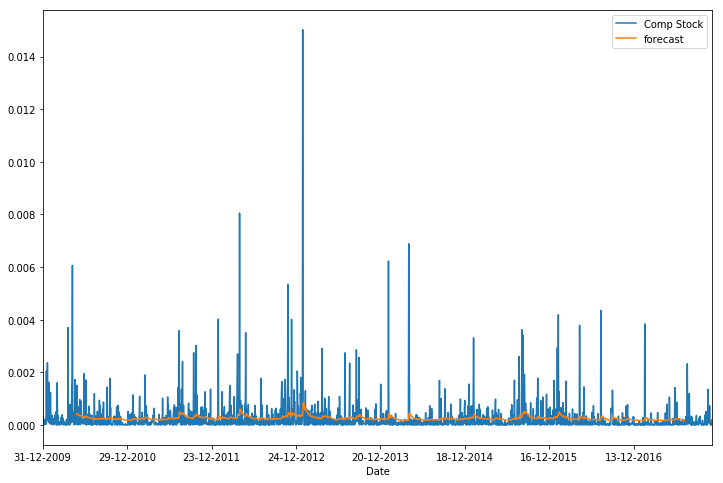

In [90]:
import datetime
df['forecast']=model_fit.predict(start=100, end =1900)
#model_fit.plot_predict(start=datetime(2014,7,1), end=datetime(2019,12,31))
#plt.show()
df[['Comp Stock','forecast']].plot(figsize=(12,8))

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


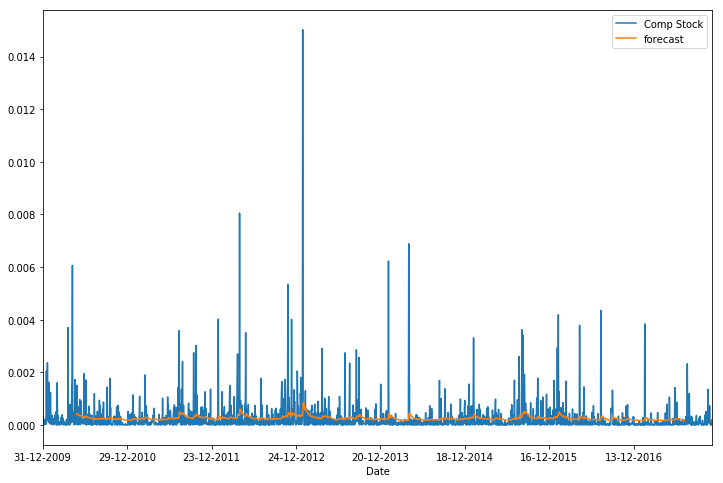

In [91]:
model=sm.tsa.statespace.SARIMAX(df['Comp Stock'],order=(1, 0, 1),seasonal_order=((1,0,1,0))) #(p,d,q,Shift)
results=model.fit(enforce_stationarity=False)
data['forecast']=results.predict(start=1000,end=5000, dynamic=True)
df[['Comp Stock','forecast']].plot(figsize=(12,8))